In [ ]:
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from statsmodels.tsa.stattools import adfuller

In [ ]:
df = pd.read_csv('stocks.csv')

def plot_all_stocks(df):
    """
    Plots stock data for all tickers in the data_dict.

    Parameters:
        data_dict (dict): Dictionary of DataFrames keyed by ticker symbol

    Returns:
        None: Displays the plot
    """

    fig = px.line(df, x="date", y="close", color="ticker",
                  title="Stock Prices Over Time",
                  labels={"date": "Date", "close": "Closing Price", "ticker": "Ticker Symbol"})
    fig.update_layout(xaxis_title="Date", yaxis_title="Closing Price")
    fig.show()


: 

: 

In [ ]:
plot_all_stocks(df)

/Users/georgeboorman/Documents/Stock-Forecaster/.venv/lib/python3.13/site-packages/plotly/express/_core.py:2061: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


: 

: 

: 

: 

In [11]:
# Pivot the dataframe to have tickers as columns and dates as index
price_pivot = df.pivot(index='date', columns='ticker', values='close')

# Compute the correlation matrix between stock closing prices
price_corr = price_pivot.corr()
print("Correlation between stock closing prices:")
print(price_corr)

Correlation between stock closing prices:
ticker     MSFT      NVDA      PLTR
ticker                             
MSFT    1.00000  0.908180  0.755550
NVDA    0.90818  1.000000  0.618864
PLTR    0.75555  0.618864  1.000000


In [ ]:
# Compute the correlation matrix for numerical columns
correlation_matrix = df.select_dtypes(include='number').corr()
print(correlation_matrix)

            open      high       low     close    volume
open    1.000000  0.999797  0.999817  0.999582 -0.576349
high    0.999797  1.000000  0.999758  0.999831 -0.575235
low     0.999817  0.999758  1.000000  0.999816 -0.579214
close   0.999582  0.999831  0.999816  1.000000 -0.577776
volume -0.576349 -0.575235 -0.579214 -0.577776  1.000000


: 

: 

: 

: 

In [ ]:
# Convert 'date' column to datetime if not already
df['date'] = pd.to_datetime(df['date'])

# Extract month and day of week for seasonality analysis
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.dayofweek

# Group by month and calculate average closing price for each ticker
monthly_seasonality = df.groupby(['ticker', 'month'])['close'].mean().unstack()
print("Monthly seasonality (average close):")
print(monthly_seasonality)

# Group by day of week and calculate average closing price for each ticker
dow_seasonality = df.groupby(['ticker', 'day_of_week'])['close'].mean().unstack()
print("\nDay-of-week seasonality (average close):")
print(dow_seasonality)

Monthly seasonality (average close):
month           1           2           3           4           5   \
ticker                                                               
MSFT    428.402500  408.090527  387.649998  378.231430  448.137620   
NVDA    135.722501  130.354736  114.923333  105.474286  127.311904   
PLTR     74.178000  104.032105   86.134286   94.614286  122.560476   

month           6           7           8           11          12  
ticker                                                              
MSFT    478.549499  506.292728  526.130005  419.126666  439.408570  
NVDA    145.695002  168.064092  179.088332  140.911110  137.219046  
PLTR    135.546500  148.186365  172.729998   63.954445   74.954762  

Day-of-week seasonality (average close):
day_of_week           0           1           2           3           4
ticker                                                                 
MSFT         435.778287  435.663159  437.888055  438.119142  438.236666
NVDA     

: 

: 

: 

: 

In [ ]:
results = adfuller(df['close'])
print("\nADF Statistic:", results[0])
print("p-value:", results[1])
print("Critical Values:", results[4])


ADF Statistic: -3.528510885888192
p-value: 0.007284363118423608
Critical Values: {'1%': np.float64(-3.442701754304053), '5%': np.float64(-2.866988120523906), '10%': np.float64(-2.5696716542766693)}


: 

: 

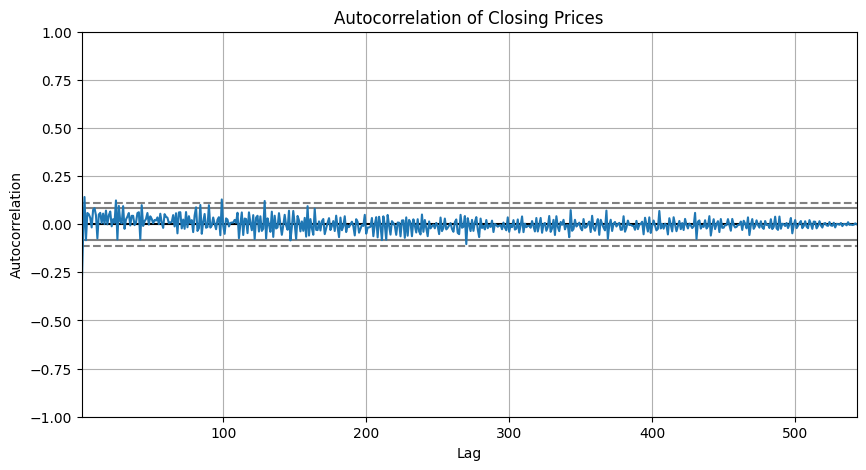

: 

: 

In [ ]:
plt.figure(figsize=(10, 5))
autocorrelation_plot(df['close'])
plt.title('Autocorrelation of Closing Prices')
plt.show()

In [ ]:
def plot_daily_difference(df):
    """
    Plots the daily difference in closing price for each ticker on a single plot.

    Parameters:
        df (pd.DataFrame): DataFrame containing 'date', 'close', and 'ticker' columns.

    Returns:
        None: Displays the plot.
    """
    # Ensure 'date' is datetime
    df['date'] = pd.to_datetime(df['date'])

    # Sort by ticker and date
    df_sorted = df.sort_values(['ticker', 'date'])

    # Calculate daily difference for each ticker
    df_sorted['close_diff'] = df_sorted.groupby('ticker')['close'].diff()

    # Plot using plotly
    import plotly.express as px
    fig = px.line(
        df_sorted,
        x='date',
        y='close_diff',
        color='ticker',
        title='Daily Closing Price Difference by Ticker',
        labels={'close_diff': 'Daily Close Difference', 'date': 'Date', 'ticker': 'Ticker'}
    )
    fig.show()

plot_daily_difference(df)

/Users/georgeboorman/Documents/Stock-Forecaster/.venv/lib/python3.11/site-packages/plotly/express/_core.py:2061: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])
/Users/georgeboorman/Documents/Stock-Forecaster/.venv/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


: 

: 

# Summary

* The data appears to be stationary, without any seasonal trends.
* NVDA and MSFT are strongly correlated, as are MSFT and PLTR 